<a href="https://colab.research.google.com/github/Ahmed0067/Ahmed0067/blob/main/Bike_Sharing_Demand_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name- AirBnb Bookings Analysis EDA Project**

**Project Type-**EDA


**Contribution-**Indivisual


**Team**-Ahmed

Bike-sharing systems have become increasingly popular in recent years due to their many benefits, which include:

**Affordable and Sustainable Transportation**: Bike-sharing systems provide an affordable and sustainable mode of transportation, especially for short trips. They are a low-cost alternative to owning a personal bike and can help reduce reliance on private cars and sharing cars, which can positively impact the environment.



**Health and comfort**: Bike-sharing systems promote physical action and exercise, positively impacting health and comfort. Regular cycling can help reduce the risk of heart disease, stroke, and other chronic diseases.

**Convenience**: Bike-sharing systems are often located in densely populated city areas, making them a convenient mode of transportation for short trips. They can be easily accessed, making them a flexible and convenient option for commuters and tourists alike.

**Reduced Traffic Congestion**: Bike-sharing systems can help reduce traffic congestion by providing an alternative mode of transportation for short trips. This can have a positive impact on town mobility.

The problem statement may involve answering specific questions such as:

What is the expected demand for bikes during peak hours, weekdays, or weekends?
How does weather (e.g., wind, temperature, precipitation) affect bike rental demand?
Are any specific locations or routes with higher or lower demand for bikes?
How can we optimize the bike-sharing system to meet fluctuating demand and minimize operational costs?
Can the bike-sharing system expand or improve to better serve users’ needs and promote sustainable transportation?

In [ ]:
import pandas as pd     #provides wide variety tools for data analysis,many inbuilt methods for grouping, combining and filtering data.
import numpy as np      #for some basic mathematical operations
from matplotlib import pyplot as plt #comprehensive library for creating static, animated, and interactive visualizations
import seaborn as sns                #  high-level interface for drawing attractive and informative statistical graphics

from sklearn.model_selection import train_test_split, GridSearchCV,  cross_val_score
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import tree

import xgboost as xgb
from xgboost import plot_importance

from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/SeoulBikeData (1).csv",encoding= 'unicode_escape')

In [ ]:
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
print("Duplicate entry in data:",len(data[data.duplicated()]))

Duplicate entry in data: 0


In [ ]:
def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100
    return temp_ps

In [ ]:
print("Total Rows and Total Columns in DataFrame is :",data.shape,"\n")
# Custom Function
datainfo()

Total Rows and Total Columns in DataFrame is : (8760, 14) 



,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Date,object,8760,365,0,0.0
Rented Bike Count,int64,8760,2166,0,0.0
Hour,int64,8760,24,0,0.0
Temperature(°C),float64,8760,546,0,0.0
Humidity(%),int64,8760,90,0,0.0
Wind speed (m/s),float64,8760,65,0,0.0
Visibility (10m),int64,8760,1789,0,0.0
Dew point temperature(°C),float64,8760,556,0,0.0
Solar Radiation (MJ/m2),float64,8760,345,0,0.0
Rainfall(mm),float64,8760,61,0,0.0


In [ ]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


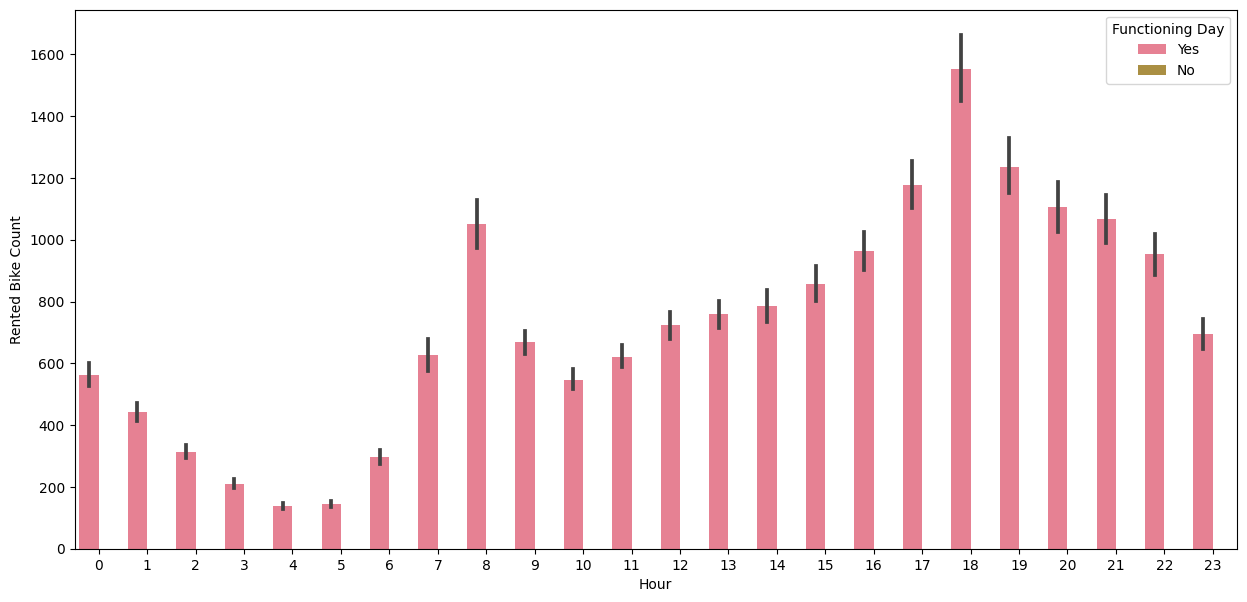

In [ ]:
def barplots(x,y,hue):
    plt.figure(figsize=(15,7))
    sns.set_palette("husl")
    sns.barplot(x=x,y=y,hue=hue,data=data);
barplots('Hour','Rented Bike Count','Functioning Day')

In [ ]:
df=data.drop(data[data['Functioning Day'] == 'No'].index)

In [ ]:
df1=df.drop(['Functioning Day'], axis = 1)

In [ ]:
print("Filtered Dataframe with only rented bike days :",df1.shape,"\n")

Filtered Dataframe with only rented bike days : (8465, 13) 



In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date']

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8465, dtype: datetime64[ns]

In [ ]:
df1['Day']=df1['Date'].dt.day
df1['Month']=df1['Date'].dt.month
df1['Year']=df1['Date'].dt.year

In [ ]:
df1.drop(columns=['Date'],inplace=True)

<Axes: >

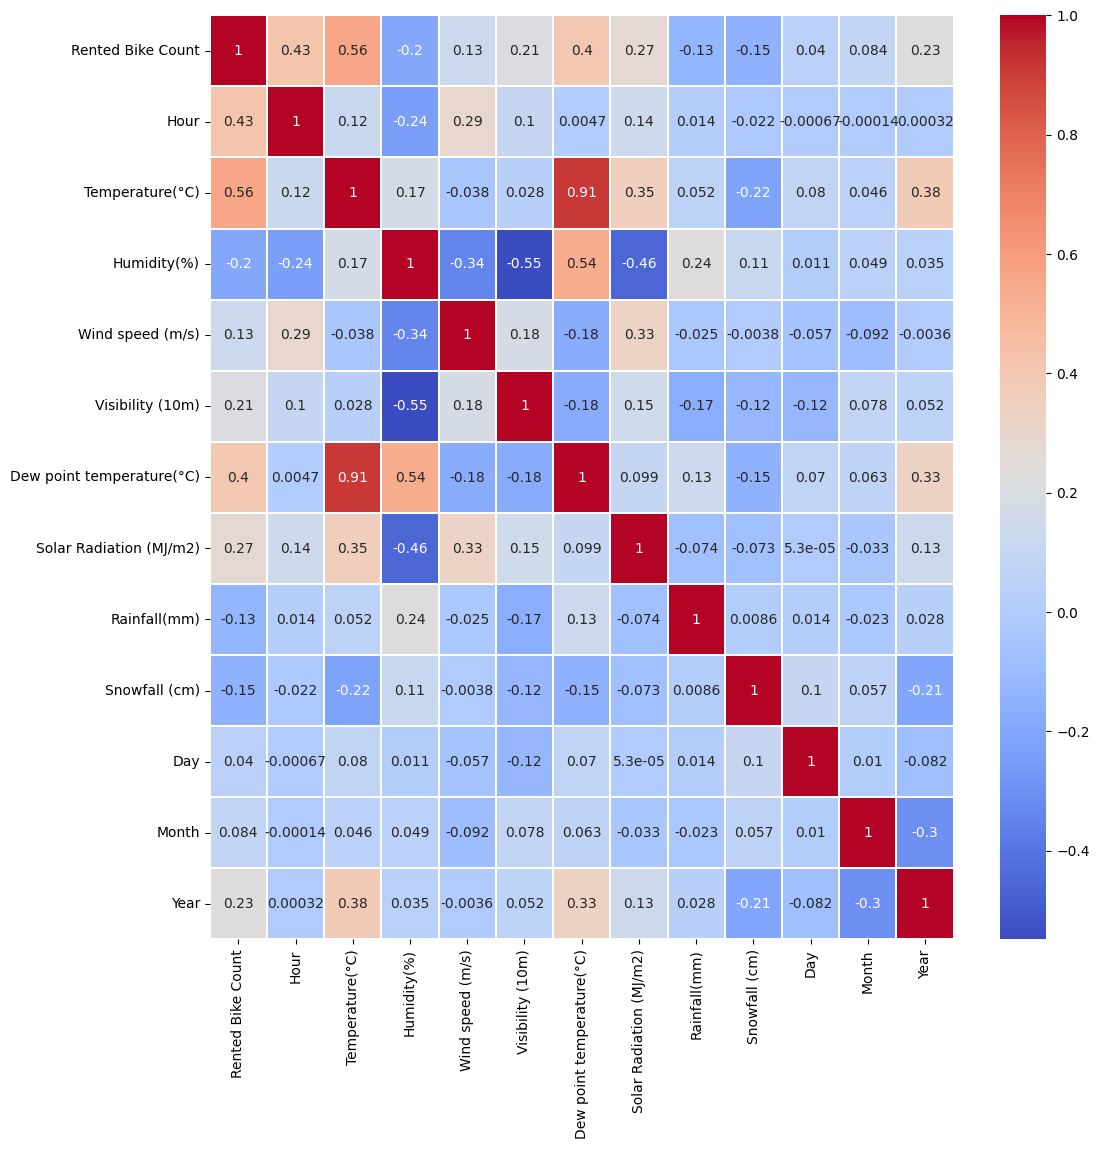

In [ ]:
data_corr= df1.corr()
plt.figure(figsize=(12,12))
sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

In [ ]:
df1.drop(columns=['Dew point temperature(°C)'],inplace=True)

In [ ]:
numerical_features=[col for col in df1.columns if df1[col].dtype!='O']
numerical_features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month',
 'Year']

In [ ]:
num_data=df1[numerical_features]
num_data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,12,1,2017
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,12,1,2017
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,12,1,2017
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,12,1,2017
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,12,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,30,11,2018
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,30,11,2018
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,30,11,2018
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,30,11,2018


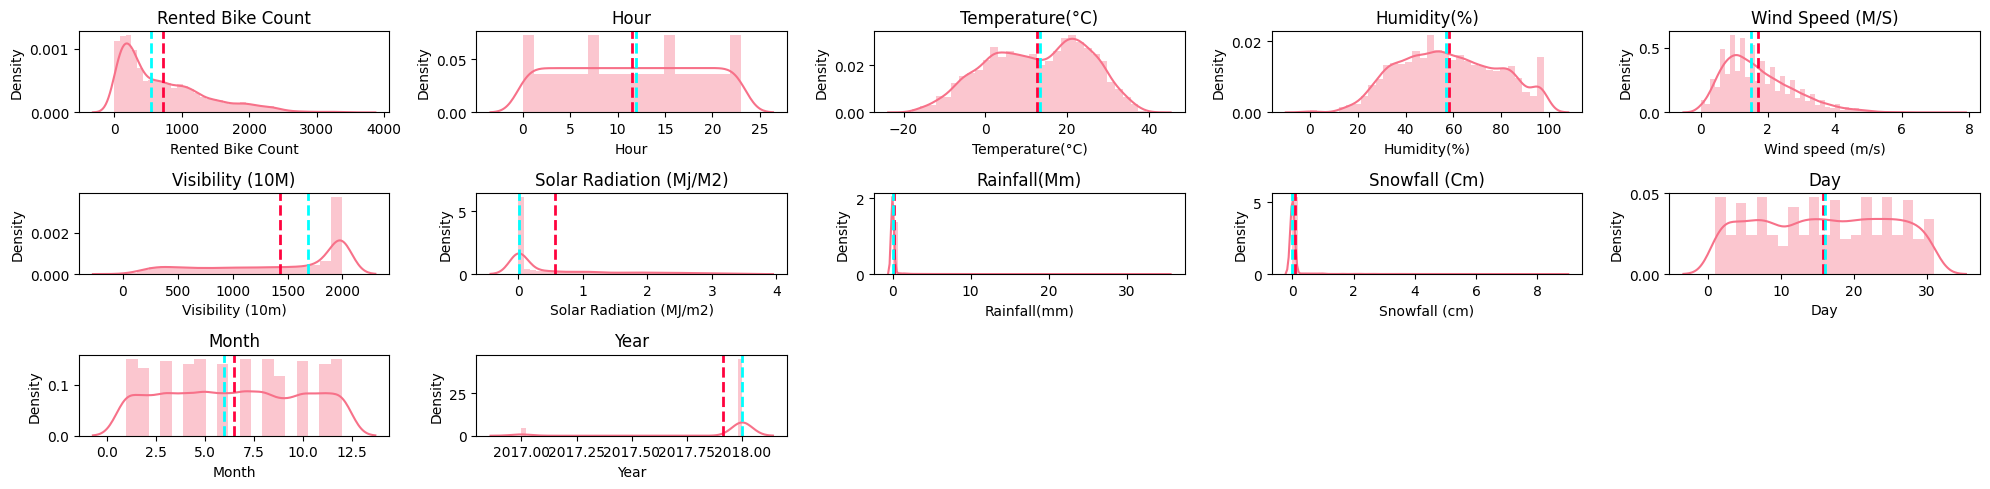

In [ ]:
fig = plt.figure(figsize = (20,5))
for index,column in enumerate(numerical_features) :
  plt.subplot(3,5,index+1)
  sns.distplot(df1[column])
  feature = df1[column]
  ax = fig.gca()
  ax.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=2)  #Rose-Red Color indicate mean of data
  ax.axvline(feature.median(), color='#00ffff', linestyle='dashed', linewidth=2) #Cyan indicate median of data
  plt.title(f'{column.title()}')
  plt.tight_layout()

In [ ]:
df1.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Rented Bike Count,1.139700,0.820305
Hour,-0.001261,-1.203446
Temperature(°C),-0.174550,-0.889578
Humidity(%),0.068649,-0.812228
Wind speed (m/s),0.894222,0.754256
Visibility (10m),-0.695306,-0.969125
Solar Radiation (MJ/m2),1.510065,1.145102
Rainfall(mm),14.616921,289.963779
Snowfall (cm),8.292830,90.542378
Day,-0.019049,-1.198170


Discrete Variables Count: 4


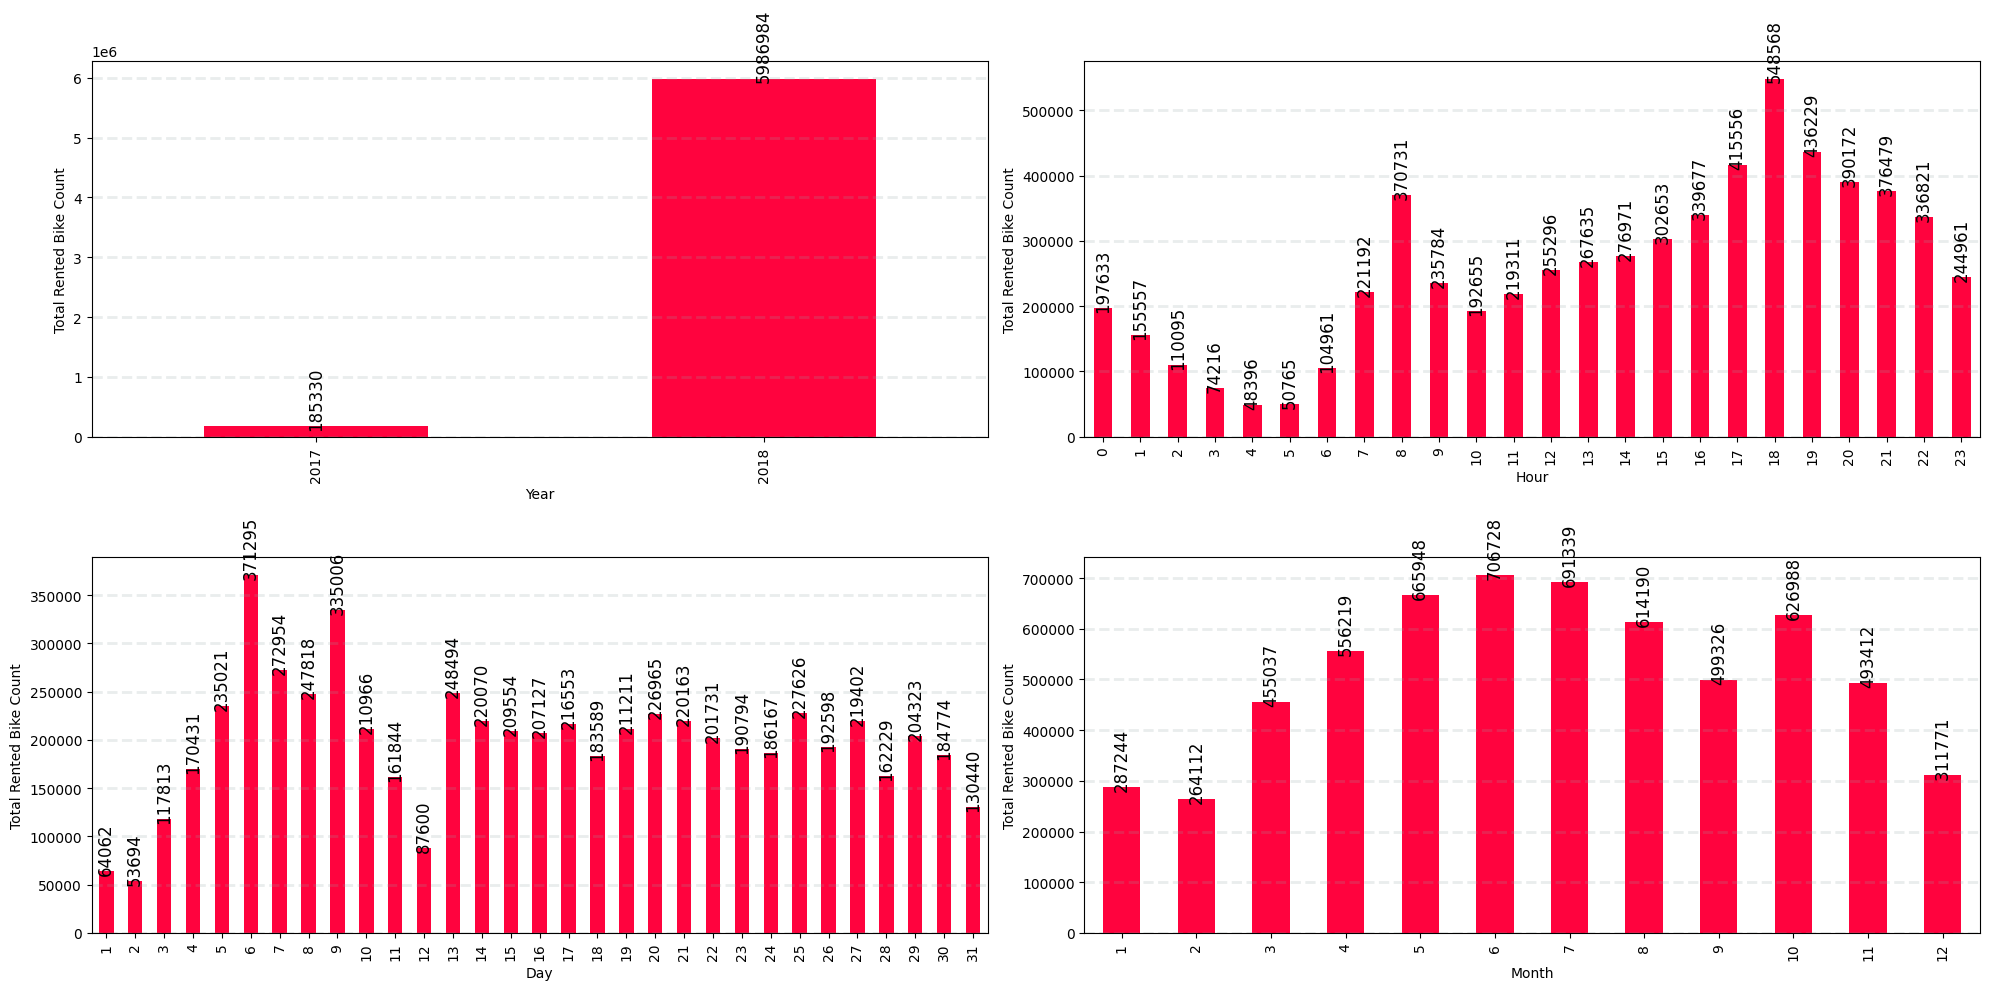

In [ ]:
num_discrete_value=[feature for feature in numerical_features if len(df1[feature].unique())<32]
print("Discrete Variables Count: {}".format(len(num_discrete_value)))

fig = plt.figure(figsize = (20,10))
for index,column in enumerate(num_discrete_value) :
  plt.subplot(2,2,index+1)
  dataset=df1.copy()
  dataset.groupby(feature)['Rented Bike Count'].sum().plot(kind='bar',color="#ff033e") #kind=bar use for ploting barchart
  feature = df1[column]
  ax = fig.gca()
  plt.ylabel('Total Rented Bike Count')
  plt.tight_layout()
  plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
  for p in ax.patches:
      ax.annotate(round(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12, rotation=90) #ha use to write count in center and rotation use to rotate count to 90 degree and make clear visible on graph

In [ ]:
categorical_features=[col for col in df1.columns if df1[col].dtype=='O']
categorical_features

['Seasons', 'Holiday']

In [ ]:
cat_data=df1[categorical_features]

In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is Seasons and number of categories are 4
The feature is Holiday and number of categories are 2


In [ ]:
data.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Seasons,Rented Bike Count
0,Summer,2283234
1,Autumn,1790002
2,Spring,1611909
3,Winter,487169


In [ ]:
data.groupby('Holiday').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Holiday,Rented Bike Count
0,No Holiday,5956419
1,Holiday,215895


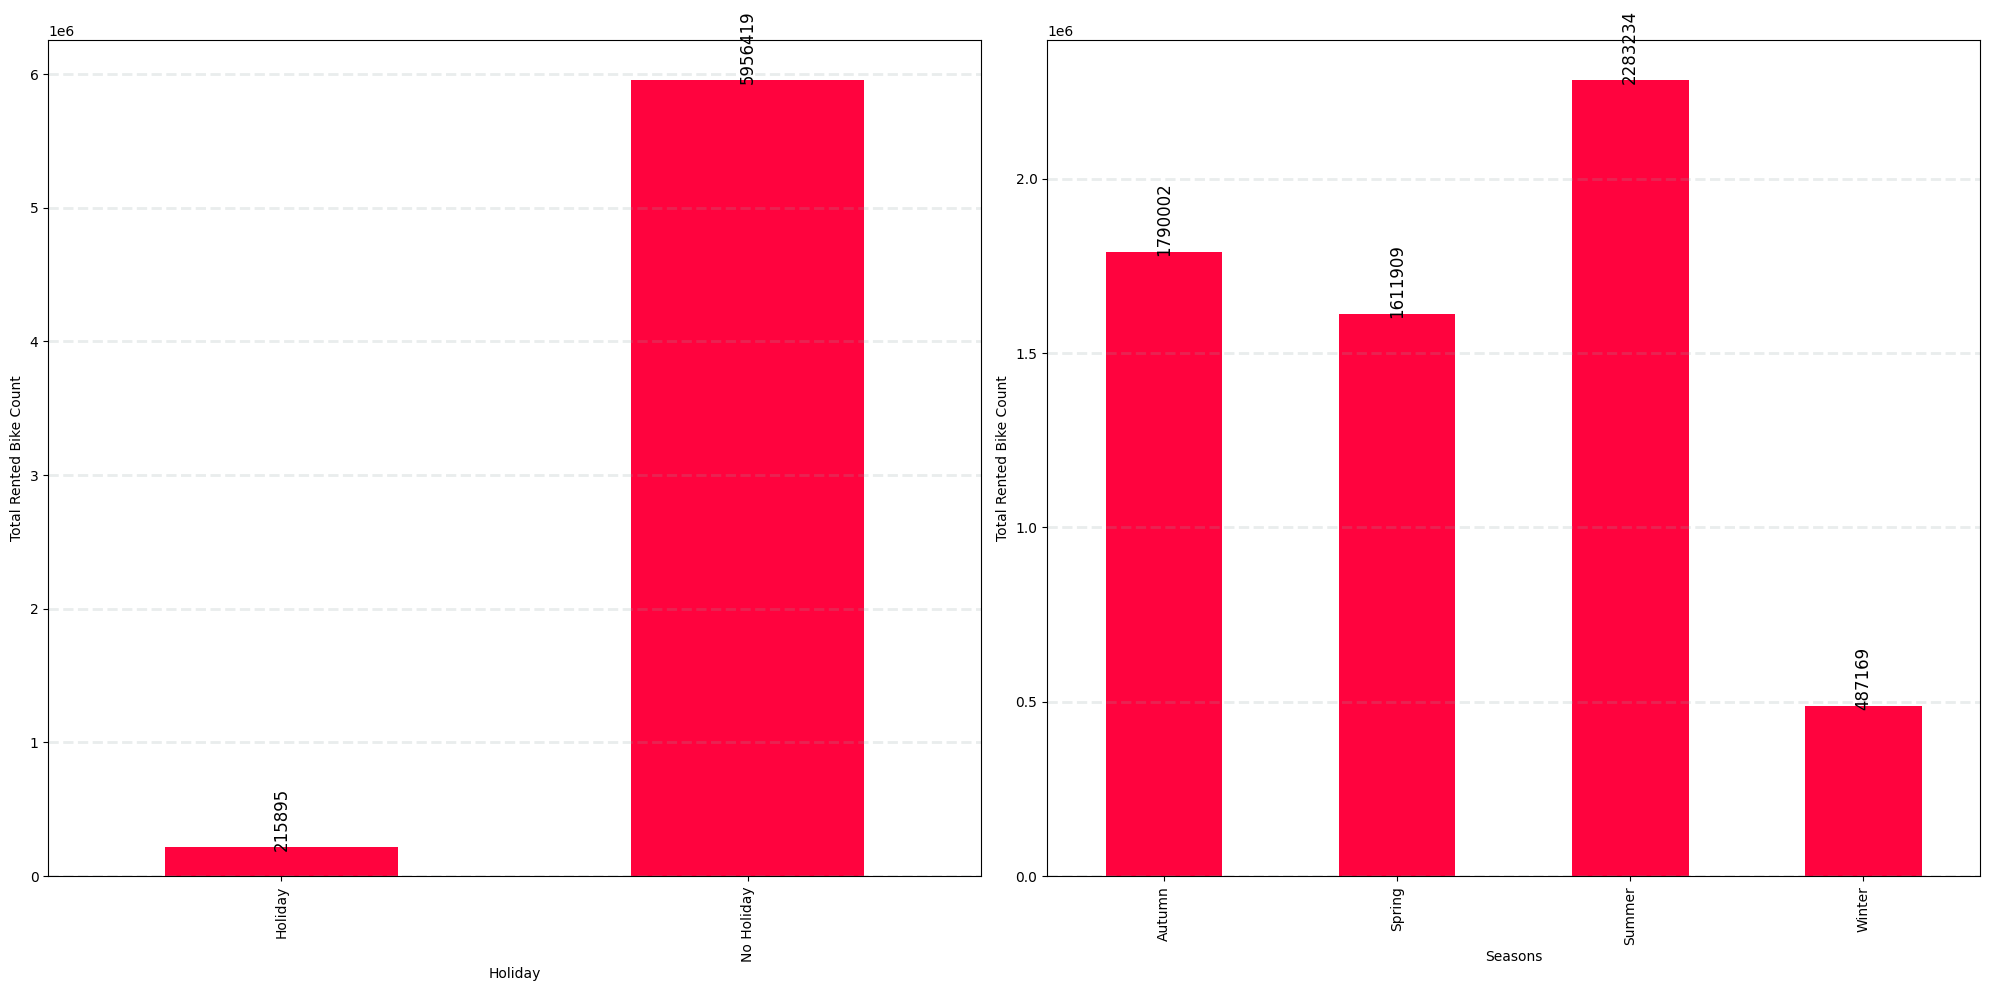

In [ ]:
fig = plt.figure(figsize = (20,10))
for index,column in enumerate(categorical_features) :
    plt.subplot(1,2,index+1)
    dataset=df1.copy()
    dataset.groupby(feature)['Rented Bike Count'].sum().plot(kind='bar',color="#ff033e")
    feature = df1[column]
    ax = fig.gca()
    plt.ylabel('Total Rented Bike Count')
    plt.tight_layout()
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
    for p in ax.patches:
        ax.annotate(round(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12, rotation=90)

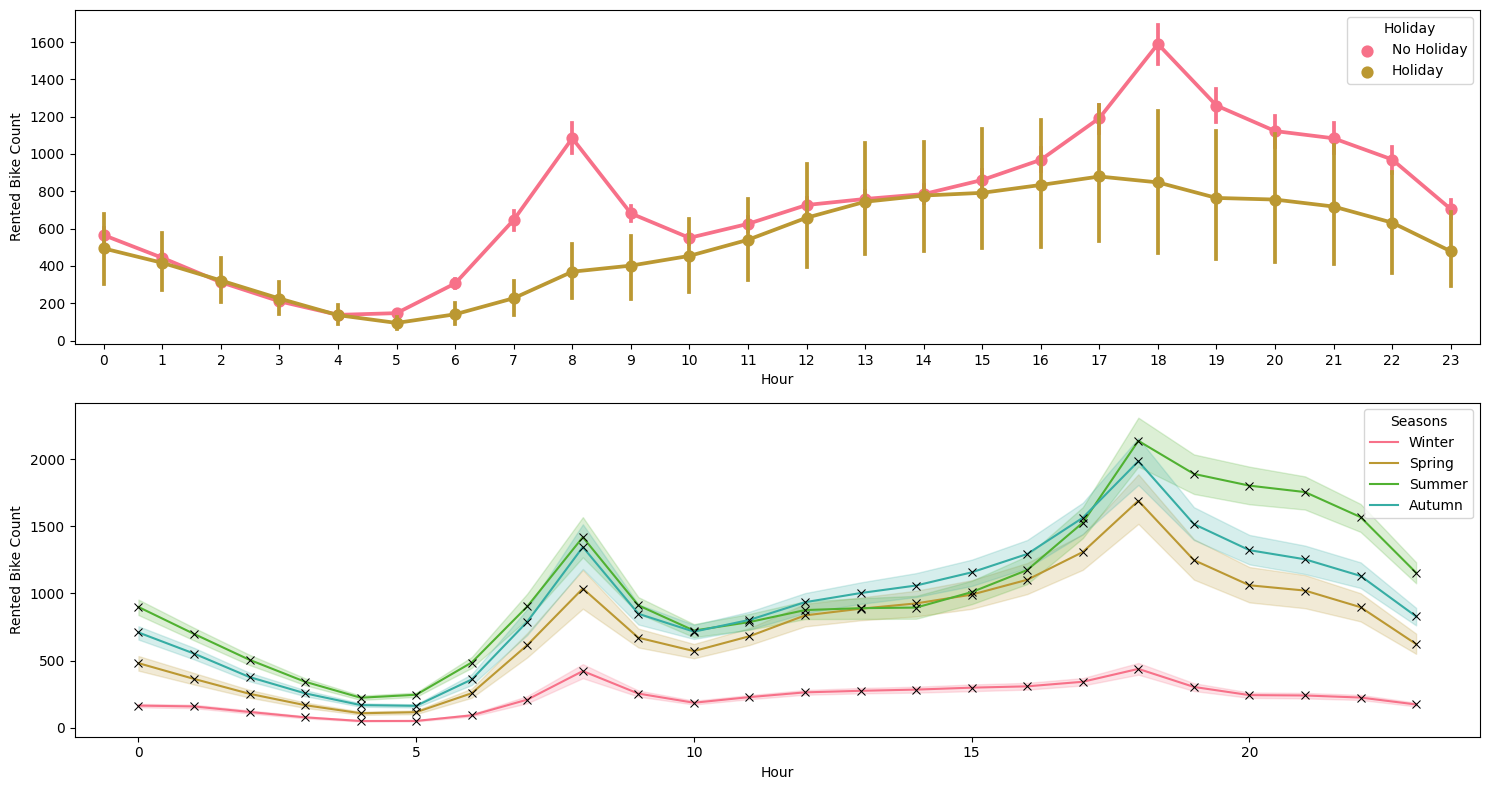

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(15,8), dpi=100)
sns.pointplot(data=dataset, x="Hour", y="Rented Bike Count", ax=axs[0],
              hue="Holiday")
sns.lineplot(data=dataset, x="Hour", y="Rented Bike Count", ax=axs[1],
              hue="Seasons", marker="x",markeredgecolor="black")
plt.tight_layout()

In [ ]:
le_df= df1.apply(LabelEncoder().fit_transform)
le_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day,Month,Year
0,252,0,111,28,22,1779,0,0,0,3,1,11,0,0
1,202,1,108,29,8,1779,0,0,0,3,1,11,0,0
2,171,2,103,30,10,1779,0,0,0,3,1,11,0,0
3,105,3,101,31,9,1779,0,0,0,3,1,11,0,0
4,76,4,103,27,23,1779,0,0,0,3,1,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,990,19,205,25,26,1673,0,0,0,0,1,29,10,1
8756,754,20,197,28,23,1779,0,0,0,0,1,29,10,1
8757,685,21,189,30,3,1747,0,0,0,0,1,29,10,1
8758,703,22,184,32,10,1639,0,0,0,0,1,29,10,1


In [ ]:
df1.groupby("Seasons").count()  #for checking raw data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Day,Month,Year
Seasons,,,,,,,,,,,,,
Autumn,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937
Spring,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160
Summer,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
Winter,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160


In [ ]:
le_df.groupby('Seasons').count() #Seasons convert to numerical after apply transformation on data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Day,Month,Year
Seasons,,,,,,,,,,,,,
0,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937
1,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160
2,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
3,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160


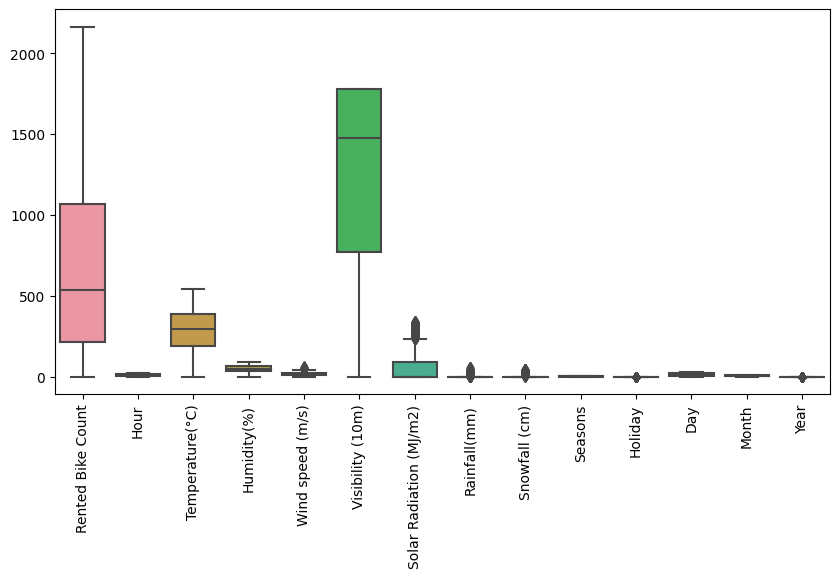

In [ ]:
#checking for outliers
plt.figure(figsize=(10,5))   # for define chart size
plt.xticks(rotation =90)     #plot X-axis ticks in 90 degree rotation for clear visible
sns.boxplot(data = le_df)    #box plot of le_df data frame raw data
plt.show()

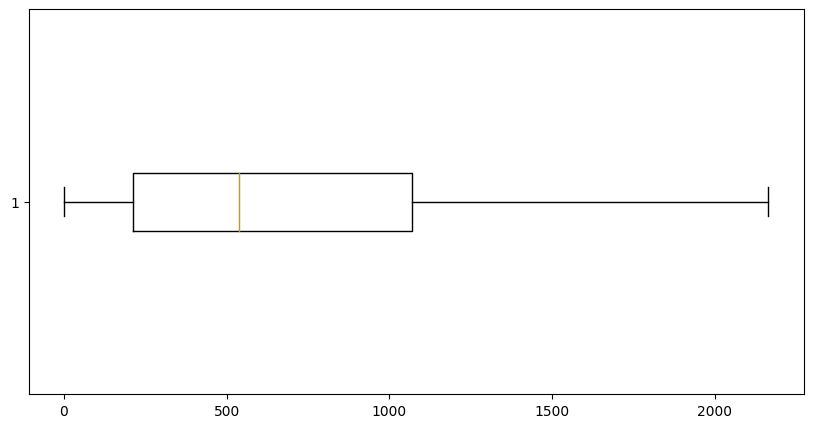

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(le_df['Rented Bike Count'],vert=False)
plt.show()

Text(0.5, 1.0, 'cube root')

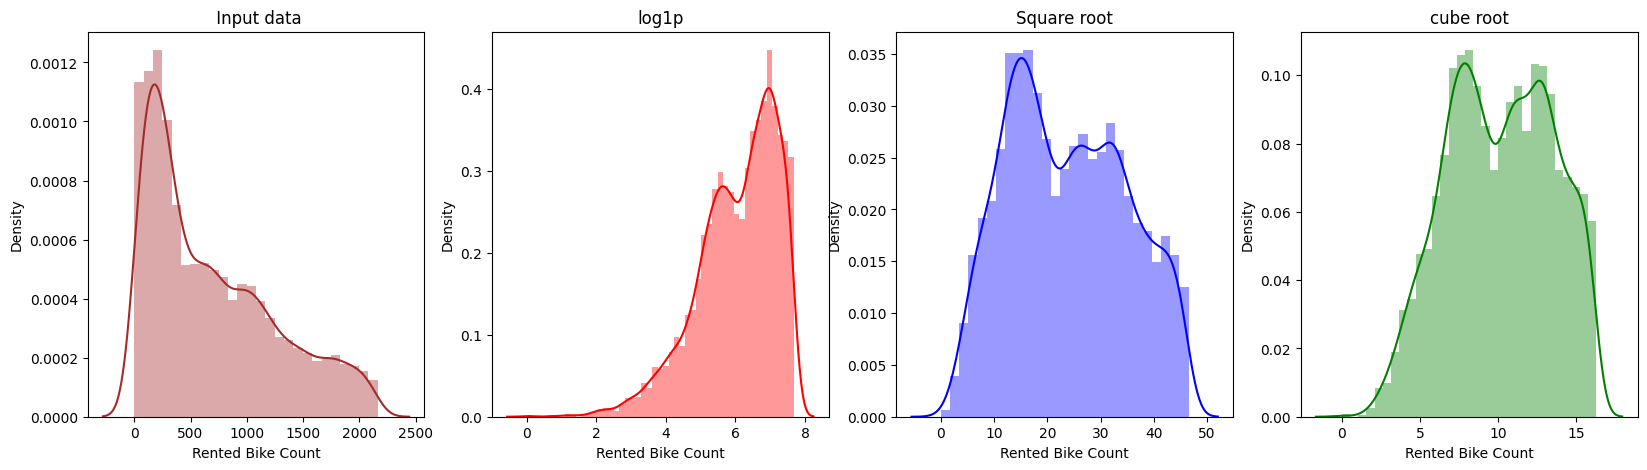

In [ ]:
fig,axes = plt.subplots(1,4,figsize=(20,5))
sns.distplot((le_df['Rented Bike Count']),ax=axes[0],color='brown').set_title(" Input data")
sns.distplot(np.log1p(le_df['Rented Bike Count']+0.0000001),ax=axes[1],color='red').set_title("log1p") #transform only posible in positive value and >0 value so add 0.0000001 in data
sns.distplot(np.sqrt(le_df['Rented Bike Count']),ax=axes[2], color='blue').set_title("Square root")
sns.distplot(np.cbrt(le_df['Rented Bike Count']*2),ax=axes[3], color='green').set_title("cube root")

In [ ]:
import scipy.stats as stats

In [ ]:
def plotvariable(df,variable):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)   #means 1 row, 2 Columns and 1st plot
  df[variable].hist(bins=30)

  ##QQ plot
  plt.subplot(1,2,2)
  stats.probplot(df[variable], dist='norm',plot=plt)
  plt.show()

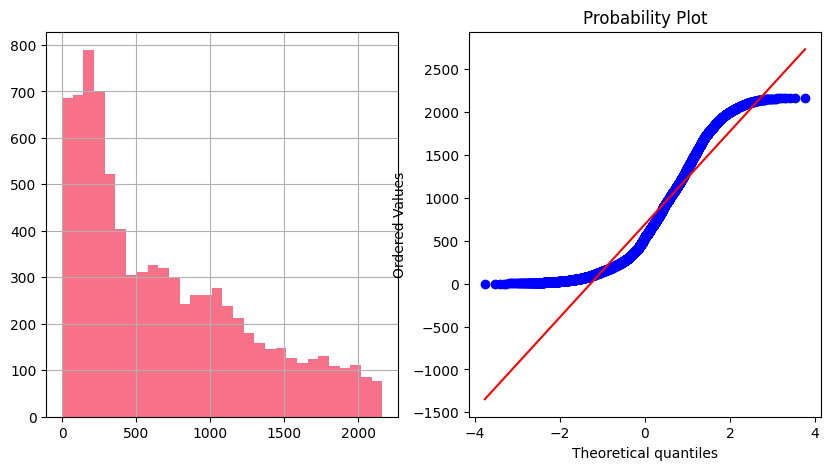

In [ ]:
plotvariable(le_df,'Rented Bike Count')

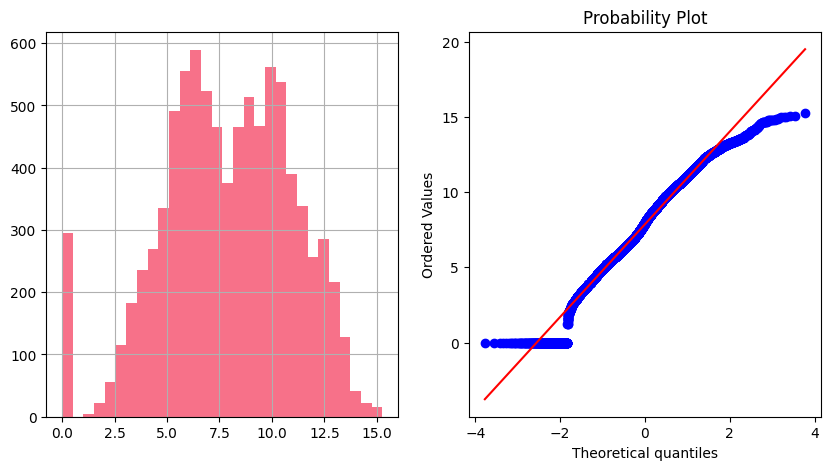

In [ ]:
data["RBC_qb"]=np.cbrt(data['Rented Bike Count']) #try cube root technique to convert positive screwd to normal distributation

plotvariable(data,"RBC_qb")

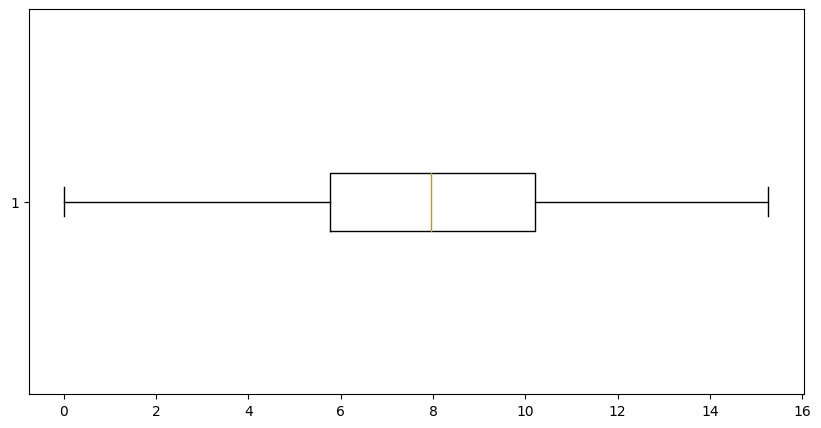

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(data["RBC_qb"],vert=False)
plt.show()

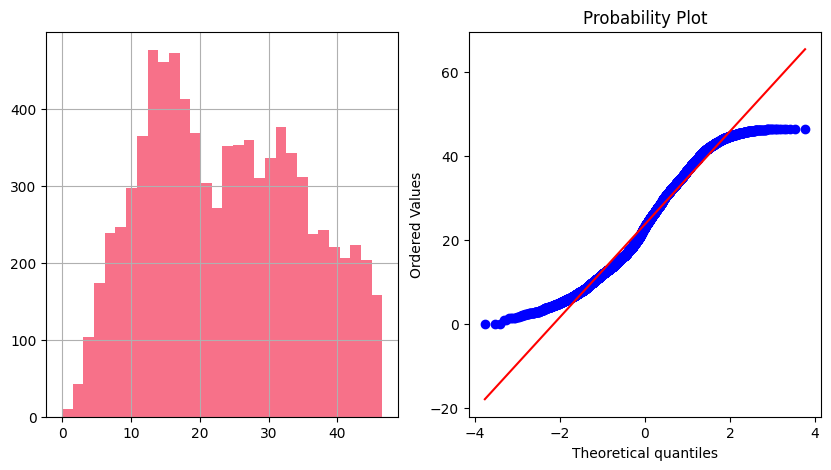

In [ ]:
le_df['Rented Bike Count']=np.sqrt(le_df['Rented Bike Count'])

plotvariable(le_df,'Rented Bike Count')

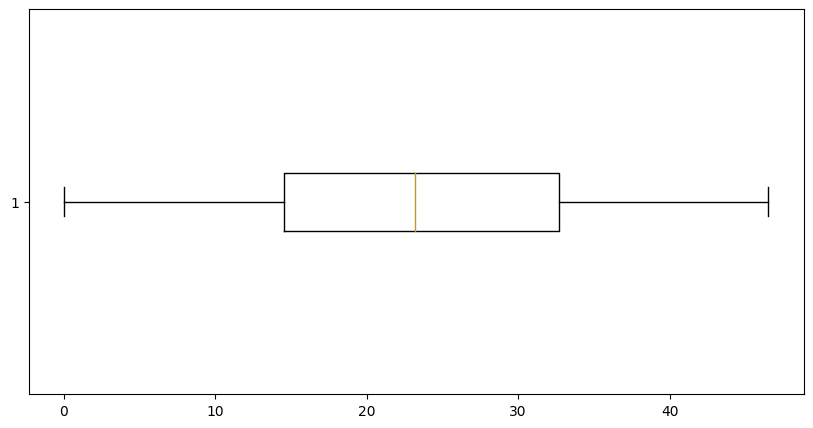

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(le_df["Rented Bike Count"],vert=False)
plt.show()


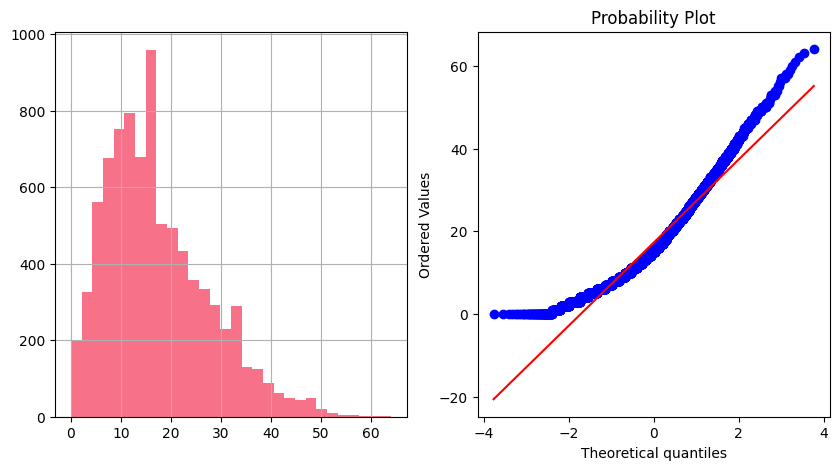

In [ ]:
plotvariable(le_df,'Wind speed (m/s)')

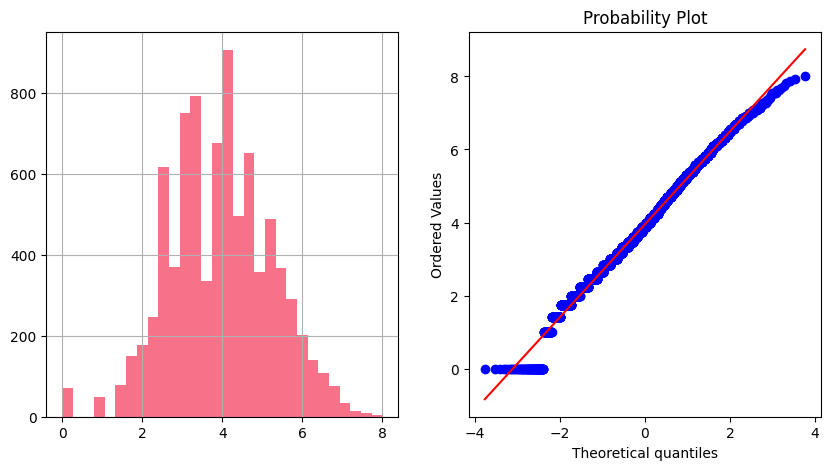

In [ ]:
le_df['Wind speed (m/s)']=np.sqrt(le_df['Wind speed (m/s)'])

plotvariable(le_df,'Wind speed (m/s)')

In [ ]:
X=le_df.drop('Rented Bike Count',axis=1)
y=le_df['Rented Bike Count']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Let's check the shape of the train and test dataset

print(f'The shape of the train and test set for the independent variables are : X_train = {X_train.shape}, X_test = {X_test.shape}')
print(f'The shape of the train and test set for the dependent variables are : y_train = {y_train.shape}, y_test = {y_test.shape}')

The shape of the train and test set for the independent variables are : X_train = (6772, 13), X_test = (1693, 13)
The shape of the train and test set for the dependent variables are : y_train = (6772,), y_test = (1693,)


In [ ]:
def predict(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
    rob =RobustScaler()

    X_train = rob.fit_transform(X_train)
    X_test = rob.transform(X_test)

    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(f'R^2 is {model.score(X_test,y_test)}\n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')

R^2 is 0.6484023843668458
 Adj R^2 is 0.645680068105243
 RMSE is: 6.782028398532071


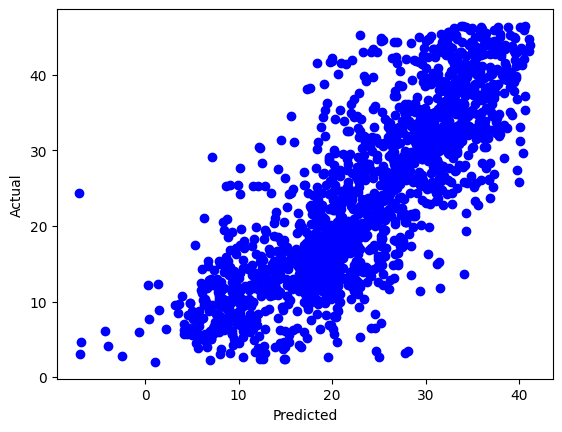

In [ ]:
predict(LinearRegression(),X,y)

R^2 is 0.8037541408287772
 Adj R^2 is 0.8022346672318588
 RMSE is: 5.066836544871314


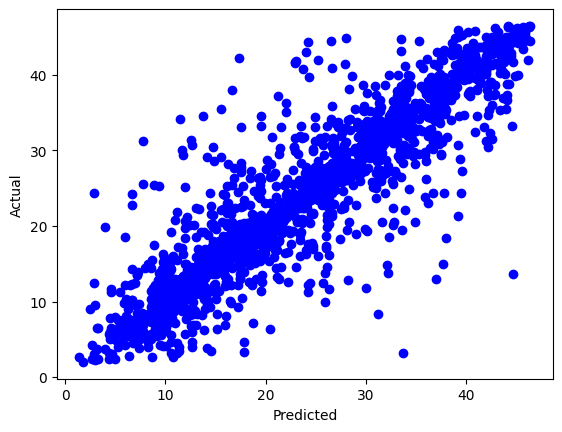

In [ ]:
predict(DecisionTreeRegressor(),X,y)

R^2 is 0.9010726333685732
 Adj R^2 is 0.9003066680521894
 RMSE is: 3.59745083811158


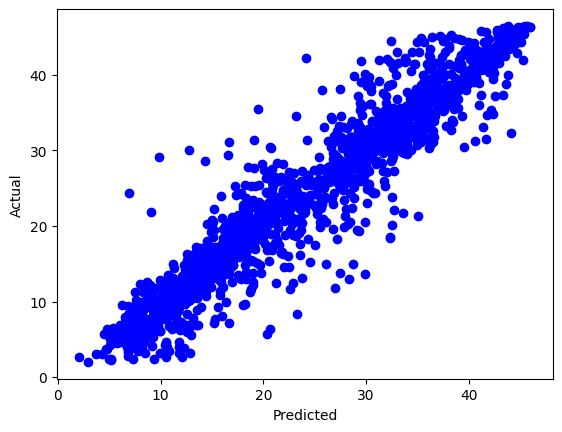

In [ ]:
predict(RandomForestRegressor(),X,y)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001901 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1034
[LightGBM] [Info] Number of data points in the train set: 6772, number of used features: 13
[LightGBM] [Info] Start training from score 23.784708
R^2 is 0.9092926042308541
 Adj R^2 is 0.9085902837156672
 RMSE is: 3.444752250753312


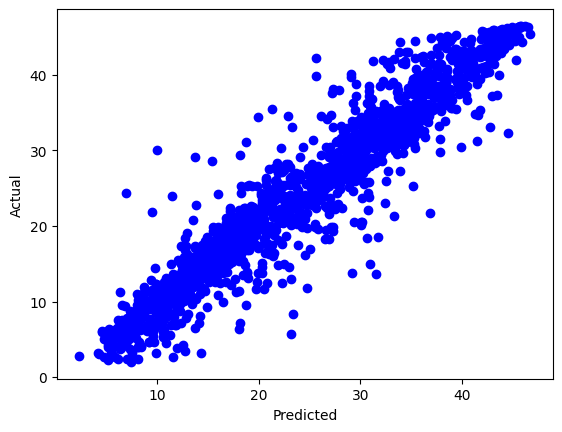

In [ ]:
predict(LGBMRegressor(),X,y)

In [ ]:
def predict_mm(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
    mm =MinMaxScaler()

    X_train = mm.fit_transform(X_train)
    X_test = mm.transform(X_test)

    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(f'R^2 is {model.score(X_test,y_test)}\n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')

R^2 is 0.6484023843668462
 Adj R^2 is 0.6456800681052435
 RMSE is: 6.782028398532068


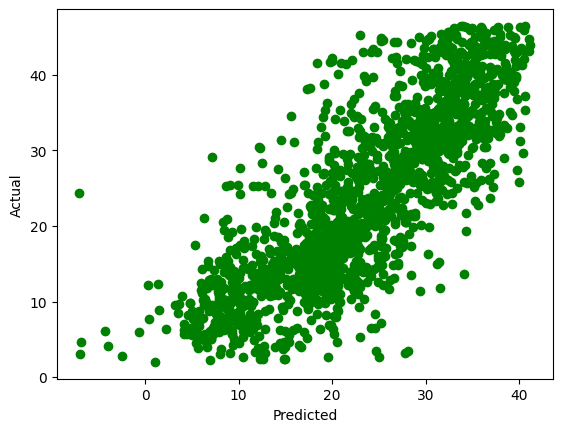

In [ ]:
predict_mm(LinearRegression(),X,y)

R^2 is 0.8079346429521568
 Adj R^2 is 0.8064475377457113
 RMSE is: 5.012578215370965


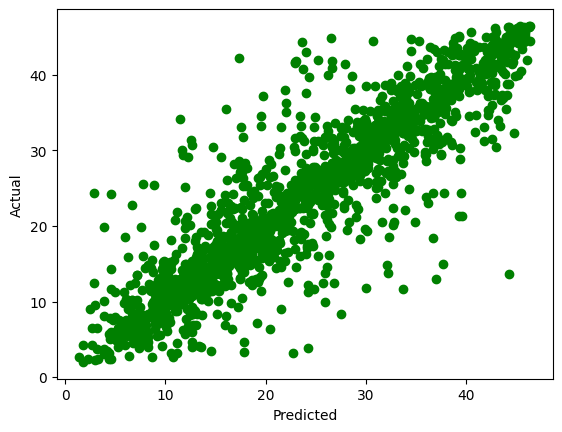

In [ ]:
predict_mm(DecisionTreeRegressor(),X,y)

R^2 is 0.901327489270084
 Adj R^2 is 0.9005634972275057
 RMSE is: 3.5928139875962897


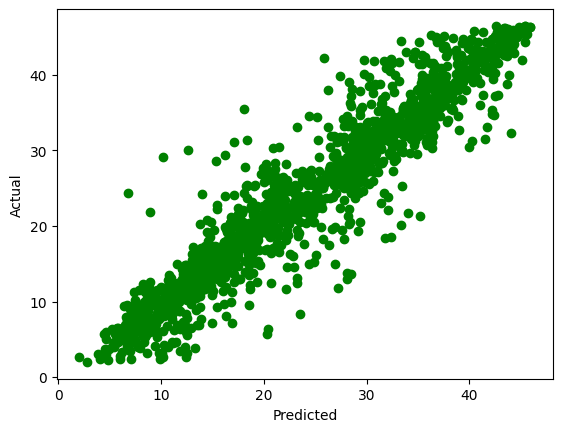

In [ ]:
predict_mm(RandomForestRegressor(),X,y)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001936 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1044
[LightGBM] [Info] Number of data points in the train set: 6772, number of used features: 13
[LightGBM] [Info] Start training from score 23.784708
R^2 is 0.9086899452289576
 Adj R^2 is 0.9079829585035117
 RMSE is: 3.4561767553073417


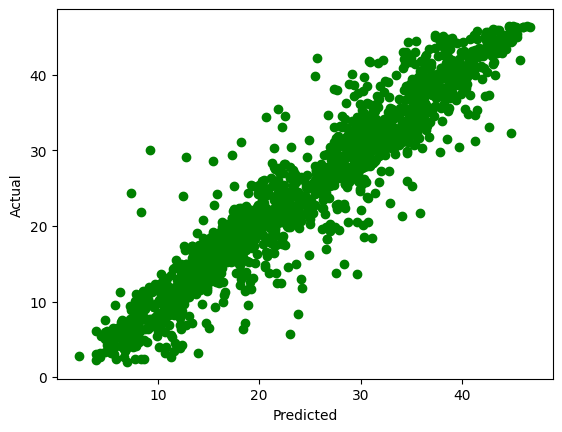

In [ ]:
predict_mm(LGBMRegressor(),X,y)

In [ ]:
def predict_ss(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
    ss =StandardScaler()

    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='r')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(f'R^2 is {model.score(X_test,y_test)} \n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')
    pred_y_df=pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_pred,"Difference":y_test-y_pred})
    print(pred_y_df[0:10])

R^2 is 0.6484023843668462 
 Adj R^2 is 0.6456800681052435
 RMSE is: 6.782028398532068
      Actual Value  Predicted Value  Difference
5028     33.749074        29.317478    4.431596
5121     11.224972         9.318051    1.906921
4191     33.955854        34.200968   -0.245115
8498     16.852300        19.913517   -3.061218
8072     41.713307        19.744203   21.969104
3300     33.075671        30.792839    2.282832
1461      7.615773         5.867516    1.748257
1324      4.472136         5.409999   -0.937863
8128     39.862263        36.828032    3.034231
16       21.931712        18.670651    3.261061


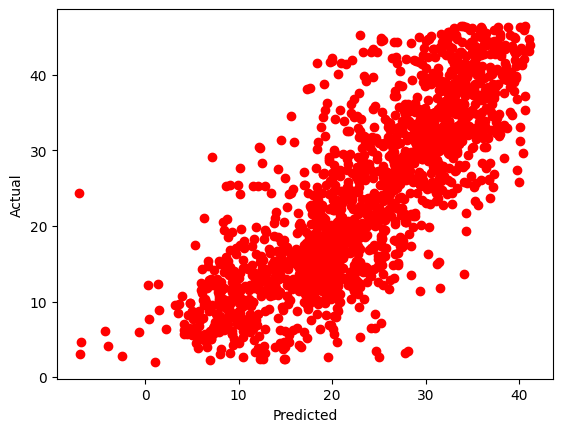

In [ ]:
predict_ss(LinearRegression(),X,y)

R^2 is 0.7912521409439375 
 Adj R^2 is 0.7896358680626219
 RMSE is: 5.225738317782828
      Actual Value  Predicted Value  Difference
5028     33.749074        32.741411    1.007663
5121     11.224972         4.582576    6.642396
4191     33.955854        35.411862   -1.456009
8498     16.852300        18.248288   -1.395988
8072     41.713307        23.021729   18.691578
3300     33.075671        29.274562    3.801108
1461      7.615773         8.366600   -0.750827
1324      4.472136         5.656854   -1.184718
8128     39.862263        34.423829    5.438434
16       21.931712        22.248595   -0.316883


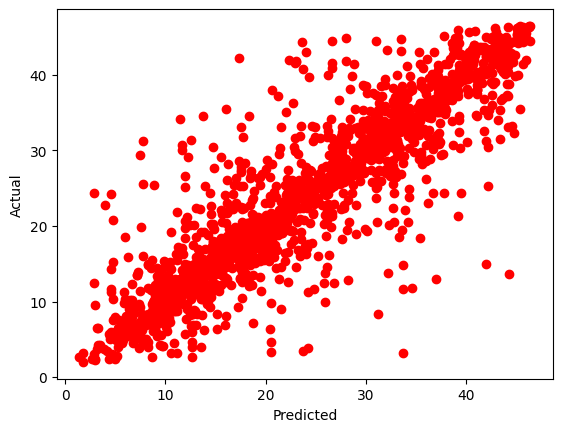

In [ ]:
predict_ss(DecisionTreeRegressor(),X,y)

R^2 is 0.9003701441005088 
 Adj R^2 is 0.8995987396176658
 RMSE is: 3.610201102030623
      Actual Value  Predicted Value  Difference
5028     33.749074        32.244369    1.504705
5121     11.224972         7.454190    3.770782
4191     33.955854        36.331474   -2.375620
8498     16.852300        17.281981   -0.429682
8072     41.713307        34.035043    7.678264
3300     33.075671        32.109348    0.966323
1461      7.615773         8.530447   -0.914674
1324      4.472136         5.716769   -1.244633
8128     39.862263        36.644122    3.218141
16       21.931712        20.252749    1.678964


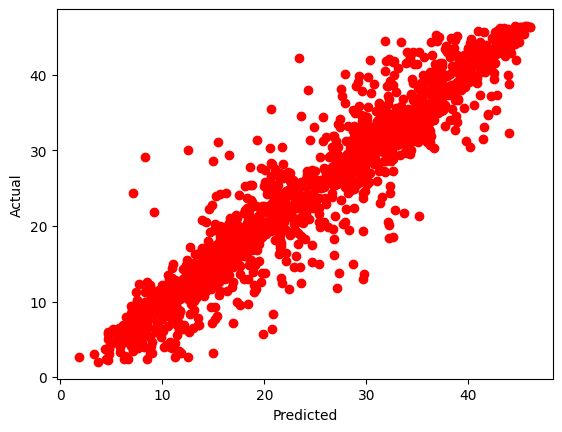

In [ ]:
predict_ss(RandomForestRegressor(),X,y)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1050
[LightGBM] [Info] Number of data points in the train set: 6772, number of used features: 13
[LightGBM] [Info] Start training from score 23.784708
R^2 is 0.9070138170111401 
 Adj R^2 is 0.9062938525210537
 RMSE is: 3.487754065892132
      Actual Value  Predicted Value  Difference
5028     33.749074        31.984073    1.765001
5121     11.224972         7.738305    3.486668
4191     33.955854        38.245208   -4.289355
8498     16.852300        16.871841   -0.019541
8072     41.713307        32.376403    9.336904
3300     33.075671        31.743416    1.332255
1461      7.615773         6.103525    1.512248
1324      4.472136         5.273349   -0.801213
8128     39.862263        37.596787    2.265476
16       21.931712       

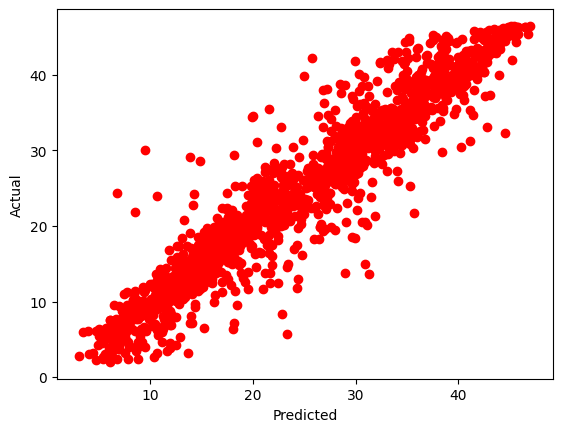

In [ ]:
predict_ss(LGBMRegressor(),X,y)

In [ ]:
import lightgbm
import time
from math import sqrt
from sklearn import preprocessing, model_selection, metrics
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
models = [
           ['LinearRegression: ',              LinearRegression()],
           ['Lasso: ',                         Lasso()],
           ['Ridge: ',                         Ridge()],
           ['KNeighborsRegressor: ',           neighbors.KNeighborsRegressor()],
           ['SVR:' ,                           SVR(kernel='rbf')],
           ['DecisionTree ',                   DecisionTreeRegressor(random_state=42)],
           ['RandomForest ',                   RandomForestRegressor(random_state=42)],
           ['ExtraTreeRegressor :',            ExtraTreesRegressor(random_state=42)],
           ['GradientBoostingRegressor: ',     GradientBoostingRegressor(random_state=42)],
           ['XGBRegressor: ',                  xgb.XGBRegressor(random_state=42)] ,
           ['Light-GBM: ',                     lightgbm.LGBMRegressor(num_leaves=41, n_estimators=200,random_state=42)],
           ['MLPRegressor: ', MLPRegressor(  activation='logistic', solver='sgd',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
]

In [ ]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1039
[LightGBM] [Info] Number of data points in the train set: 6772, number of used features: 13
[LightGBM] [Info] Start training from score 23.796232


In [ ]:
model_data

[{'Name': 'LinearRegression: ',
  'Train_Time': 0.009809017181396484,
  'Train_R2_Score': 0.6478907877040745,
  'Test_R2_Score': 0.6583635068923448,
  'Test_RMSE_Score': 6.4352389952296525},
 {'Name': 'Lasso: ',
  'Train_Time': 0.03146624565124512,
  'Train_R2_Score': 0.6362247150339719,
  'Test_R2_Score': 0.6434832997542703,
  'Test_RMSE_Score': 6.573890897623658},
 {'Name': 'Ridge: ',
  'Train_Time': 0.021601438522338867,
  'Train_R2_Score': 0.6478907426327043,
  'Test_R2_Score': 0.6583560977217399,
  'Test_RMSE_Score': 6.435308776306985},
 {'Name': 'KNeighborsRegressor: ',
  'Train_Time': 0.038655757904052734,
  'Train_R2_Score': 0.7595401403043068,
  'Test_R2_Score': 0.634924859314125,
  'Test_RMSE_Score': 6.65232844723656},
 {'Name': 'SVR:',
  'Train_Time': 4.767035484313965,
  'Train_R2_Score': 0.45718840668401606,
  'Test_R2_Score': 0.4651504542193533,
  'Test_RMSE_Score': 8.051899927587922},
 {'Name': 'DecisionTree ',
  'Train_Time': 0.054327964782714844,
  'Train_R2_Score': 1.

In [ ]:
df_all_model=pd.DataFrame(model_data)
df_all_model

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,LinearRegression:,0.009809,0.647891,0.658364,6.435239
1,Lasso:,0.031466,0.636225,0.643483,6.573891
2,Ridge:,0.021601,0.647891,0.658356,6.435309
3,KNeighborsRegressor:,0.038656,0.759540,0.634925,6.652328
4,SVR:,4.767035,0.457188,0.465150,8.051900
5,DecisionTree,0.054328,1.000000,0.796217,4.970115
6,RandomForest,3.650670,0.985689,0.888823,3.671046
7,ExtraTreeRegressor :,2.487441,1.000000,0.895523,3.558714
8,GradientBoostingRegressor:,1.450515,0.888886,0.872145,3.936779
9,XGBRegressor:,1.670625,0.977729,0.898301,3.511089


In [ ]:
gbr = GradientBoostingRegressor()
gbr_params = {
    "n_estimators":[250,500,1000],
    "max_depth":[2,4,6],
    "learning_rate":[0.01,0.1,1],
    "loss": ['ls','huber','quantile'],
}

In [ ]:
regressor = GridSearchCV(gbr, gbr_params, verbose=1,cv=3,n_jobs=-1)
regressor.fit(X_train,y_train)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'loss': ['ls', 'huber', 'quantile'],
                         'max_depth': [2, 4, 6],
                         'n_estimators': [250, 500, 1000]},
             verbose=1)

In [ ]:
regressor.best_params_

{'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 6, 'n_estimators': 500}

In [ ]:
regressor.best_estimator_

GradientBoostingRegressor(loss='huber', max_depth=6, n_estimators=500)

In [ ]:
predictions = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Root Mean Squared Error is {:.4f} '.format(np.sqrt(mean_squared_error(y_test,
                                                    regressor.predict(X_test)))) )

Root Mean Squared Error is 3.4503 


In [ ]:
X=le_df.drop('Rented Bike Count',axis=1)
y=le_df['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
#
# Standardize the dataset
#
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
#
# Hyperparameters for GradientBoostingRegressor
#
gbr_params = {'n_estimators': 1000,
          'max_depth': 6,
          'min_samples_split': 10,
          'learning_rate': 0.1,
          'loss': 'huber'}
#
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
gbr.fit(X_train_std, y_train)
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbr.score(X_test_std, y_test))
#
# Create the mean squared error
#
mse = mean_squared_error(y_test, gbr.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print('Root Mean Squared Error is {:.4f} '.format(np.sqrt(mean_squared_error(y_test,
                                                    regressor.predict(X_test)))) )

Model Accuracy: 0.903
The mean squared error (MSE) on test set: 11.7839
Root Mean Squared Error is 3.4503 


In [ ]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]

#
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
#

# step-3: perform grid search
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor()
#
# Fit the model
#
gbr.fit(X_train_std, y_train)
rfe = RFE(gbr)

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, param_grid = hyper_params, scoring= 'r2', cv = folds,  verbose = 1, return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=GradientBoostingRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
model_cv.best_params_

{'n_features_to_select': 9}

In [ ]:
model_cv.best_estimator_

RFE(estimator=GradientBoostingRegressor(), n_features_to_select=9)

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import XGBRegressor

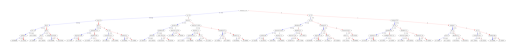

In [ ]:
X=le_df.drop('Rented Bike Count',axis=1)
y=le_df['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
#
# Standardize the dataset
#
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

model = XGBRegressor()
model.fit(X,y)
# plot single tree
plot_tree(model)
plt.show()

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.530045,0.552088,0.006551,0.002259,1,{'n_features_to_select': 1},0.361295,0.402071,0.365298,0.376353,0.355651,0.372134,0.016431,13,0.404222,0.391979,0.401497,0.398413,0.401965,0.399615,0.004244
1,7.380782,0.368919,0.006555,0.001094,2,{'n_features_to_select': 2},0.666478,0.681030,0.646984,0.638830,0.633079,0.653280,0.017893,12,0.669658,0.665498,0.673406,0.677222,0.676440,0.672445,0.004376
2,6.946518,0.594286,0.006897,0.001231,3,{'n_features_to_select': 3},0.837312,0.845714,0.825117,0.803386,0.809731,0.824252,0.015989,11,0.837033,0.832370,0.838992,0.843732,0.841052,0.838636,0.003841
3,6.836633,0.735108,0.006316,0.000806,4,{'n_features_to_select': 4},0.854857,0.857177,0.860957,0.831293,0.834339,0.847725,0.012365,10,0.861919,0.858851,0.859440,0.864616,0.865505,0.862066,0.002668
4,6.174534,0.536209,0.005850,0.000846,5,{'n_features_to_select': 5},0.871430,0.869556,0.873798,0.853896,0.856980,0.865132,0.008087,9,0.877846,0.877062,0.875711,0.880692,0.879471,0.878156,0.001757
5,5.714991,0.545546,0.005819,0.000712,6,{'n_features_to_select': 6},0.870642,0.872383,0.874676,0.857496,0.859326,0.866904,0.007076,8,0.880360,0.879136,0.878457,0.883879,0.882833,0.880933,0.002096
6,5.034689,0.554733,0.005740,0.000817,7,{'n_features_to_select': 7},0.873924,0.872930,0.876096,0.859951,0.859091,0.868398,0.007325,7,0.883531,0.881322,0.880586,0.886822,0.883377,0.883127,0.002172
7,4.715999,0.609902,0.006671,0.001030,8,{'n_features_to_select': 8},0.876290,0.875303,0.880095,0.862908,0.862355,0.871390,0.007330,6,0.885275,0.883327,0.883355,0.888750,0.887475,0.885636,0.002179
8,3.897744,0.475717,0.006535,0.001152,9,{'n_features_to_select': 9},0.880944,0.879237,0.883424,0.867340,0.864797,0.875148,0.007575,1,0.887912,0.887049,0.885427,0.891514,0.890586,0.888498,0.002251
9,3.455287,0.571690,0.005760,0.000828,10,{'n_features_to_select': 10},0.878451,0.878116,0.881797,0.866064,0.863723,0.873630,0.007286,3,0.887463,0.887191,0.885589,0.891069,0.891030,0.888468,0.002203


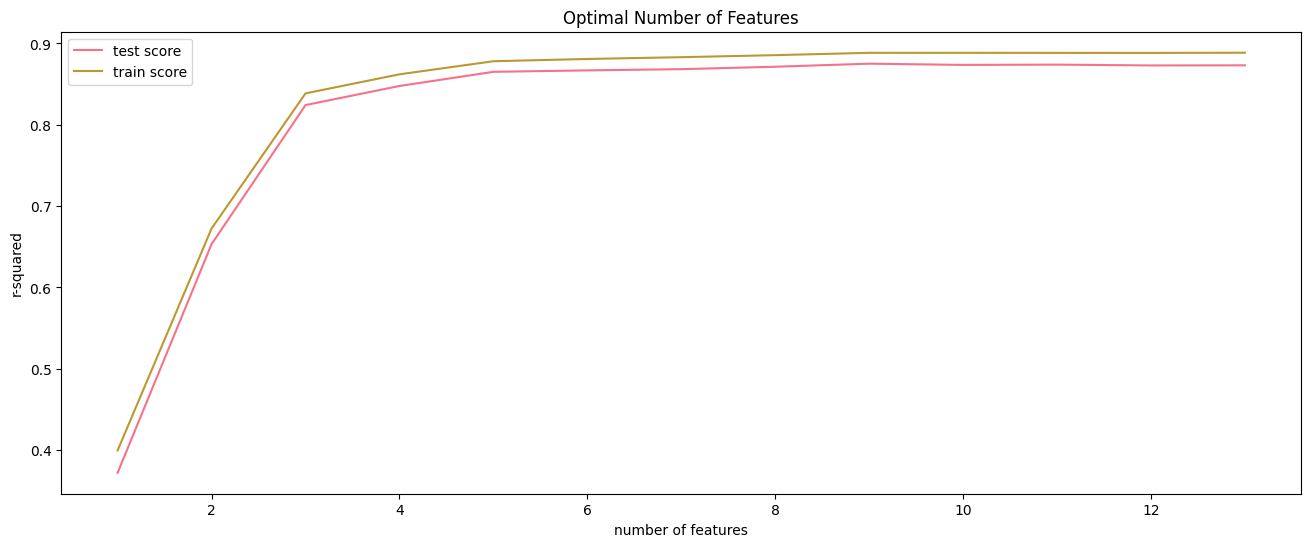

In [ ]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')